<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/Extraa/PracticeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame({'A':[1,2,3,4],
                   'B':["yes","no","no","yes"],
                   'C':[4,5,6,8],
                   'D':[7,8,9,11],
                   'E':[9,np.nan, 3,15],
                   'F':[5,3,6,12],
                   'G':["P","N","N","P"],
                   })
df

,A,B,C,D,E,F,G
0,1,yes,4,7,9.0,5,P
1,2,no,5,8,NaN,3,N
2,3,no,6,9,3.0,6,N
3,4,yes,8,11,15.0,12,P


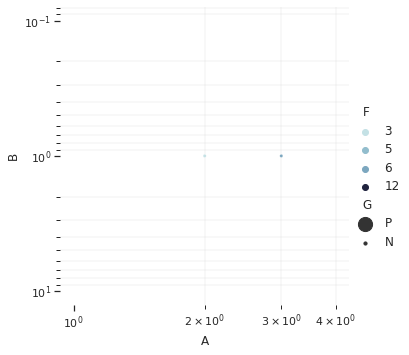

In [10]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="A", y="B",
    hue="F", size="G",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

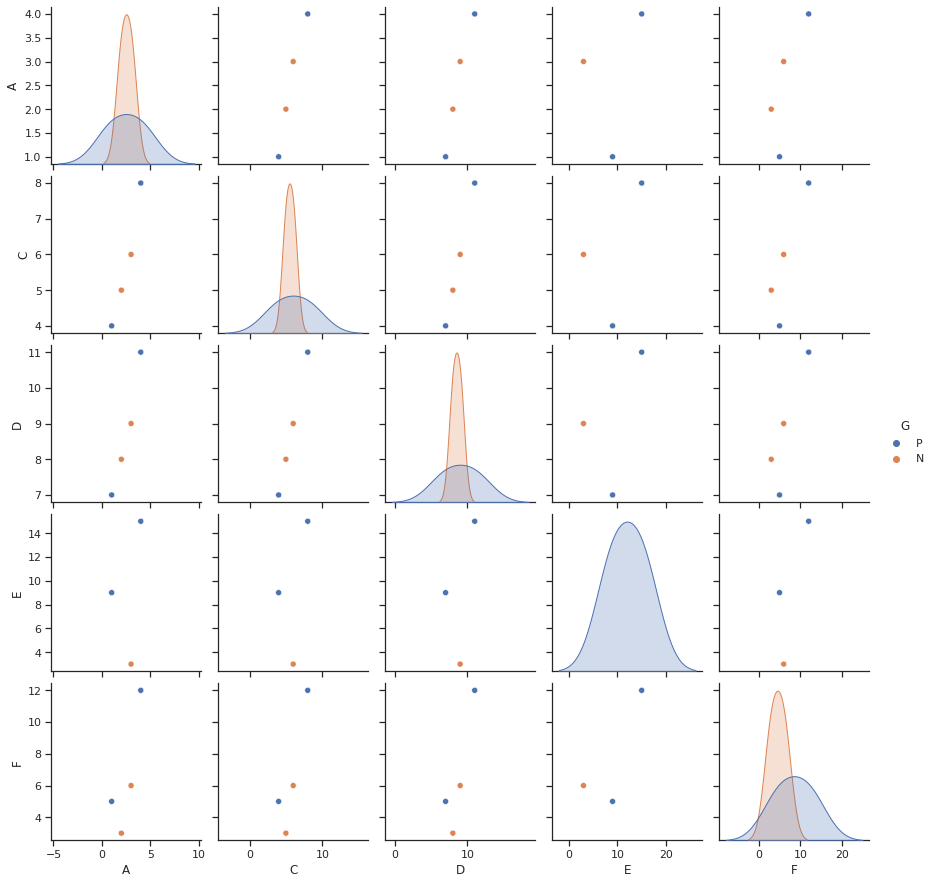

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="G")

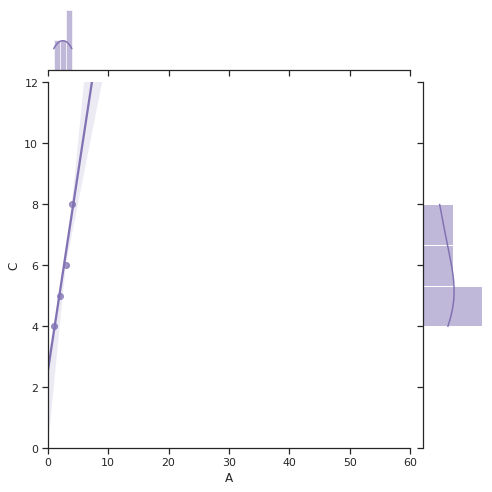

In [42]:
g = sns.jointplot(x="A", y="C", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:,6].values

In [13]:
X

array([[1, 'yes', 4, 7, 9.0, 5],
       [2, 'no', 5, 8, nan, 3],
       [3, 'no', 6, 9, 3.0, 6],
       [4, 'yes', 8, 11, 15.0, 12]], dtype=object)

In [14]:
p = X[:, 1:3]
p

array([['yes', 4],
       ['no', 5],
       ['no', 6],
       ['yes', 8]], dtype=object)

In [15]:
y

array(['P', 'N', 'N', 'P'], dtype=object)

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 0:5])
X[:, 0:5] = imputer.transform(X[:, 0:5])

In [17]:
X

array([[1, 'yes', 4, 7, 9.0, 5],
       [2, 'no', 5, 8, 3.0, 3],
       [3, 'no', 6, 9, 3.0, 6],
       [4, 'yes', 8, 11, 15.0, 12]], dtype=object)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X

array([[0.0, 1.0, 1, 4, 7, 9.0, 5],
       [1.0, 0.0, 2, 5, 8, 3.0, 3],
       [1.0, 0.0, 3, 6, 9, 3.0, 6],
       [0.0, 1.0, 4, 8, 11, 15.0, 12]], dtype=object)

In [20]:
y

array(['P', 'N', 'N', 'P'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([1, 0, 0, 1])

In [23]:
X= np.asarray(X)
y= np.asarray(y)

In [24]:
X

array([[0.0, 1.0, 1, 4, 7, 9.0, 5],
       [1.0, 0.0, 2, 5, 8, 3.0, 3],
       [1.0, 0.0, 3, 6, 9, 3.0, 6],
       [0.0, 1.0, 4, 8, 11, 15.0, 12]], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 1.41421356, -1.41421356, -0.26726124, -0.39223227, -0.39223227,
        -1.22474487, -0.95025527],
       [-0.70710678,  0.70710678, -1.06904497, -0.98058068, -0.98058068,
         0.        , -0.43193421],
       [-0.70710678,  0.70710678,  1.33630621,  1.37281295,  1.37281295,
         1.22474487,  1.38218948]])

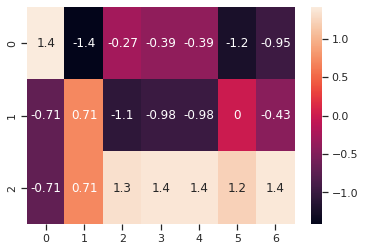

In [46]:
sns.heatmap(X_train, annot=True)

In [28]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")
else:
  print("Ok")

Ok


# Create dates dataframe with frequency 

In [29]:

date = pd.date_range('01/01/2022', periods = 12, freq ='M')
 
date

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
# Create date and time with dataframe
rng = pd.DataFrame()
rng['date'] = pd.date_range('01/01/2022', periods = 12, freq ='M')
 
# Print the dates in dd-mm-yy format
rng[:3]
 
# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
 
# Print the dates divided into features
rng


,date,year,month,day
0,2022-01-31,2022,1,31
1,2022-02-28,2022,2,28
2,2022-03-31,2022,3,31
3,2022-04-30,2022,4,30
4,2022-05-31,2022,5,31
5,2022-06-30,2022,6,30
6,2022-07-31,2022,7,31
7,2022-08-31,2022,8,31
8,2022-09-30,2022,9,30
9,2022-10-31,2022,10,31
